# Разведочный анализ данных

Это задание посвящено изучению данных и построению различных визуализаций.  
Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы будем работать с датассетом пассажиров [Титаника](https://en.wikipedia.org/wiki/Titanic).

Классическая задача, решаемая на этих данных: предсказать, выжил пассажир или нет по его характеристикам.  
То есть целевая переменная - столбец `Survived`.

Цели:
* познакомиться с библиотекой `seaborn`
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус:
* придумаем свою модель на основе проведенного анализа и оценим ее качество.

## Подключение библиотек и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Фиксируем `random_state` для воспроизводимости случайных значений.

In [ ]:
RANDOM_STATE = 42

Загрузим данные.

In [ ]:
Data = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv",
                   sep=";")

## Обзор данных

Посмотрим на 5 случайных объектов из датасета.

In [ ]:
Data.sample(5)

Выведите на экран размеры таблицы *Data*.

**Вопрос:** сколько объектов в данных?

In [ ]:
# ваш код здесь

## Обработка признаков и однофакторный анализ

На данном этапе:

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

Выведем на экран основные числовые характеристики числовых столбцов.  
Это можно сделать при помощи функции `describe`.

In [ ]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


В строке *count* отображается количество непропущенных значений в каждом столбце.

Основные статистики можно посмотреть и по категориальным колонкам.  
Для этого в функцию `describe` нужно передать аргумент `include='object'`.

Сделайте это.

In [ ]:
# ваш код здесь

**Вопрос:** в скольких категориальных колонках есть пропуски?

### Столбец Sex

В столбце пол (*Sex*) три различных значения. Посмотрим на них.

In [ ]:
Data['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

Удалим пассажиров неизвестного пола, так как их всего 5.

In [ ]:
Data = Data[Data['Sex'] != 'unknown']

Проверьте, что строки с неизвестным полом исчезли. 

In [ ]:
# ваш код здесь

Признак *Sex* является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. 

Закодировать значения столбца с двумя категориями можно следующим образом. Пусть в воображаемом столбце *animal* есть два значения: *cat* и *dog*. Их можно перевести в 0 и 1 при помощи функции `map`:

`Data['animal'] = Data['animal'].map({'cat' : 1, 'dog' : 0})`


По аналогии закодируйте столбец *Sex* (male - 1, female - 0).

In [ ]:
# ваш код здесь

**Вопрос** посчитайте сумму значений в закодированном столбце *Sex*.

In [ ]:
# ваш код здесь

Посмотрим, как влияет пол на выживаемость.

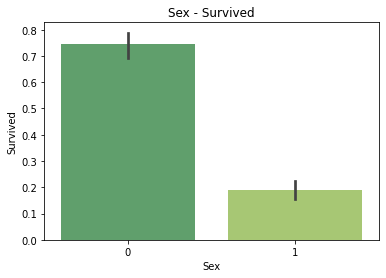

In [ ]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show();

Гистограмму можно детализировать, добавив значение параметра `hue`.

### Столбец Pclass

Нарисуйте гистограмму выживаемости в зависимости от *Pclass*.  
Используйте `barplot`.

In [ ]:
# ваш код здесь

**Вопрос:** пассажиры из какого класса выживали чаще всего? 

Посмотрим, как влияет пол человека и класс билета (*Pclass*) на выживаемость

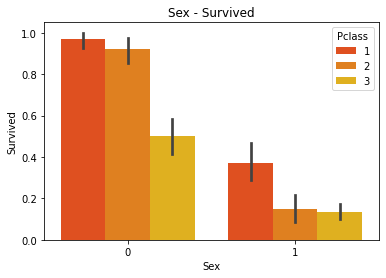

In [ ]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show();

### Столбец Embarked

**Вопрос** сколько различных значений принимает признак *Embarked*?

In [ ]:
# ваш код здесь

Пока что мы не обсуждали, как переводить в числа категориальные признаки с больше, чем двумя категориями.  
Поэтому давайте выкинем этот признак.

Сделайте это (вам пригодится метод [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)).

In [ ]:
# ваш код здесь

### Столбец Age

Обработаем признак *Age*.

Мы помним, что в этом признаке много пропусков.

Заполним пропуски медианным значением *Age*.

In [ ]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

In [ ]:
sns.displot(Data['Age'], kde=True)
plt.show();

### Другие столбцы

Удалите признак *Fare*. Он сильно связан с признаком *Pclass*, поэтому нам не нужен.

In [ ]:
# ваш код здесь

**Вопрос:** сколько на данный момент колонок в таблице *Data*?

Столбец *PassengerId* является категориальным и не несёт важной информации, удалите его.

Столбцы *Ticket*, *Name* и *Cabin* в этот раз нам также не понадобятся. Удалите и их.

In [ ]:
# ваш код здесь

После минимальной обработки данных у нас получилась следующая таблица:

In [ ]:
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Исследование признаков

Нарисуйте матрицу корреляций столбцов между собой.

In [ ]:
# ваш код здесь

**Вопрос:** какой столбец сильнее всего коррелирует с целевой переменной *Survived*?

Посмотрим на попарные зависимости некоторых признаков.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


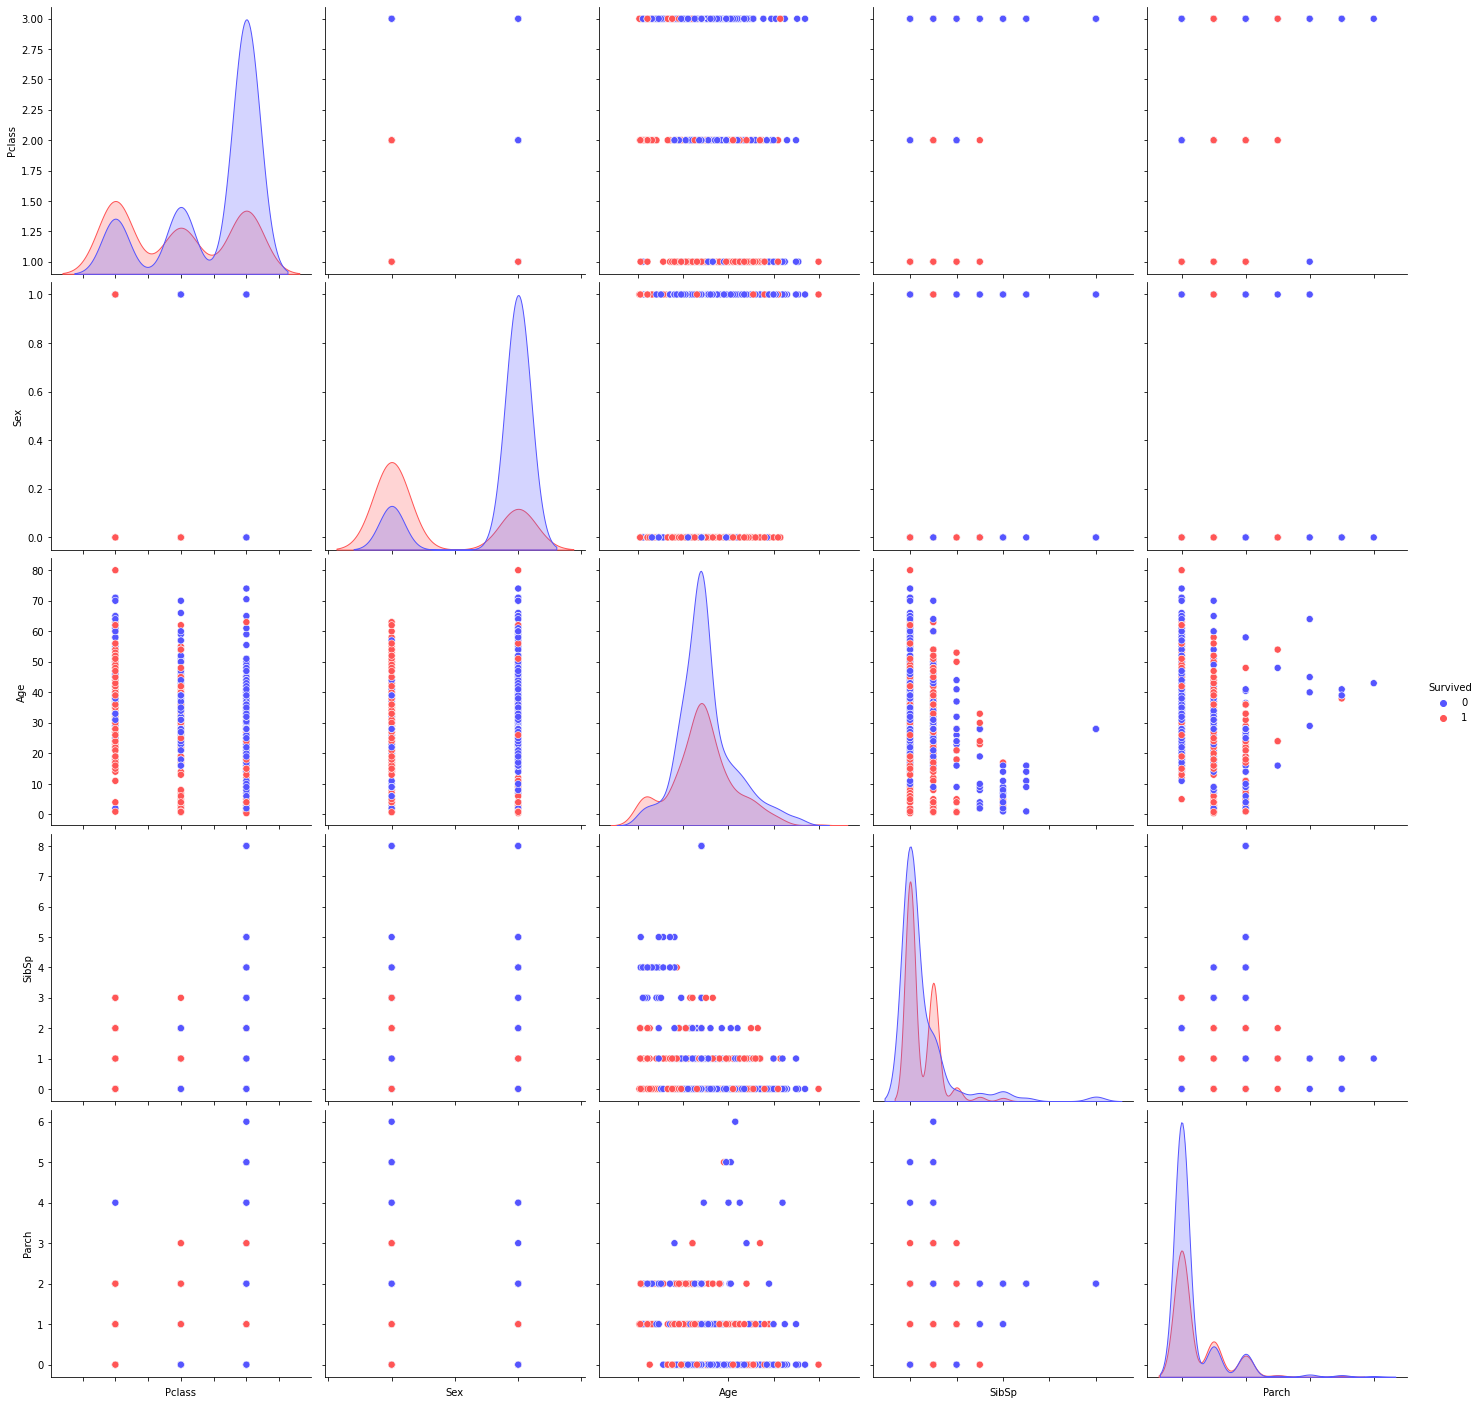

In [ ]:
g = sns.pairplot(Data, hue='Survived', palette = 'seismic', height=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[]);

## Бонус (не проверяется)

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки *Parch* и *SibSp* слабо коррелируют с выживаемостью (*Survived*). Можно сконструировать новые признаки, чтобы решить эти вопросы.

Попробуйте сделать следующее.

1) Создайте признак *NameLen* и запишите в него длину имени (*Name*).

2) Создайте признак *FamilySize*, равный *Parch + SibSp + 1*. Зачем добавлять 1?

3) Создайте признак *IsAlone*, который показывает, путешествовал человек один или с семьей.

In [ ]:
# ваш код здесь

Посмотрите, как коррелируют новые признаки со столбцом *Survived*.

In [ ]:
# ваш код здесь

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
# ваш код здесь

Мы провели  однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет. 

Мы видим, что больше всего на выживаемость влияет пол пассажира.


### Наша собственная модель

Напишем свою модель, предсказывающую выживаемость только по признаку *Sex*.

In [ ]:
def prediction(x):
    if x.Sex == 1:
        return 0
    return 1

Посчитаем долю правильных ответов нашей модели.

In [ ]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)